## Ch 12 - Distributed Lossy Compression

Reference: Ch 12 of A. El Gamal and Y.-H. Kim, _Network Information Theory_, Cambridge University Press, 2011.

Author: Cheuk Ting Li  

In [1]:
from psitip import *
PsiOpts.setting(solver = "pyomo.glpk")     # Set linear programming solver
PsiOpts.setting(repr_latex = True)         # Jupyter Notebook LaTeX display
PsiOpts.setting(venn_latex = True)         # LaTeX in diagrams
PsiOpts.setting(proof_note_color = "blue") # Reasons in proofs are blue

### Thm 12.1 (Berger-Tung Inner Bound)

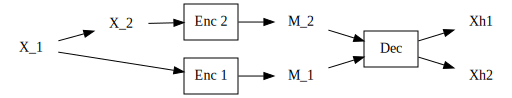

In [2]:
X1, X2 = rv_array("X", 1, 3)
Xh1, Xh2 = rv("Xh1", latex="\hat{X}_1"), rv("Xh2", latex="\hat{X}_2")
M1, M2 = rv_array("M", 1, 3)
R1, R2 = real_array("R", 1, 3)
U1, U2 = rv_array("U", 1, 3)
Q = rv("Q")

model = CodingModel()        # Define distributed lossy compression
model.set_rate(M1, R1)       # The rate of M1, M2 are R1, R2 resp.
model.set_rate(M2, R2)
model.add_edge(X1, X2)       # X1, X2 are correlated source
model.add_node(X1, M1,
            label = "Enc 1") # Encoder 1 maps X1 to M1
model.add_node(X2, M2,
            label = "Enc 2") # Encoder 2 maps X2 to M2
model.add_node(M1+M2, Xh1+Xh2,
            label = "Dec")   # Decoder maps M1,M2 to Xh1,Xh2

model.graph()                # Draw diagram

In [3]:
# Automatic inner bound, give Berger-Tung inner bound [Berger 1978], [Tung 1978]
r = model.get_inner(is_proof=True)
r.display(note=True)

<IPython.core.display.Math object>

### Thm 12.2 (Berger-Tung Outer Bound)

In [4]:
# Write the Berger-Tung outer bound [Berger 1978], [Tung 1978]
r_bt_out = region(
        R1 >= I(X1+X2 & U1 | U2),
        R2 >= I(X1+X2 & U2 | U1),
        R1+R2 >= I(X1+X2 & U1+U2),
        markov(Xh1+Xh2, U1+U2, X1+X2),
        markov(U1, X1, X2),
        markov(U2, X2, X1)
    ).exists(U1+U2)
r_bt_out

( ( R_1 >= I(X_1+X_2&U_1|U_2) )
 &( R_2 >= I(X_1+X_2&U_2|U_1) )
 &( R_1+R_2 >= I(X_1+X_2&U_1+U_2) )
 &( markov(U_1, X_1, X_2) )
 &( markov(X_1+X_2, U_1+U_2, Xh1+Xh2) )
 &( markov(U_2, X_2, X_1) ) ).exists(U_1+U_2)

In [5]:
# Proof of outer bound
model.proof_outer(r_bt_out)

### Thm 12.3 (Quadratic Gaussian Distributed Source Coding)

Skipped

### Thm 12.4 (Quadratic Gaussian CEO Problem)

Skipped

### References
- A. El Gamal and Y.-H. Kim, _Network Information Theory_, Cambridge University Press, 2011, Ch. 12.
- T. Berger, "Multiterminal source coding," in The Information Theory Approach to Communications, G. Longo, Ed. New York: Springer-Verlag, 1978, pp. 171–231.
- S.-Y. Tung, "Multiterminal source coding," Ph.D. dissertation, Cornell University, Ithaca, NY, 1978.
